<a href="https://colab.research.google.com/github/imbiotech/K-PDA_GMP_W-S/blob/main/k_pda_gmp_w_s.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Machine Learning을 활용한 데이터 처리 및 분석 <br/>내부 적용 가능성에 대한 검토**
---


# 들어가기 전
---

**지난 10/06 한국 PDA에서 주최한 GMP Workshop에 참석했습니다.**  
**`"최근 AI를 활용한 의약품 제조 및 품질 관리"`와 관련된 Workshop 이었으며, 그 중 이틀차 Python을 활용한 몇 가지 데이터 분석 실습 관련 세션에 참여하였습니다.**  
**최근 업계에서는 `"머신 러닝을 활용한 빅 데이터 처리 및 분석"` 등으로 이야기 하는 분야로서 우리 회사 내에 얼마나 적용 가능성이 있을 지는 지속적으로 검증이 필요한 부분 중 하나이나,**  
**우선 관련 내용을 공유 드리기 위해 아래와 같이 정리하여 드리니 테스트 해보시고 적용 가능 분야를 같이 고민해 주시면 감사하겠습니다.**  
**아래 자료는 해당 세션의 강연자인 강원대 김화종 교수님의 자료와 각종 참고 데이터를 편집 및 재가공한 것입니다.**  
**오류 지적 및 수정 요청에 대한 코멘트는 언제든지 부탁 드립니다.**

#### 추가
**MySUNI를 통한 관련 강좌를 수강하여 계속 내용 업데이트 중에 있습니다.**

---

# 목차

- 개발 환경(Development Environment)
  - 콜랩(Colab)이란?
  - 파이썬(Python)이란?
  - 쥬피터 노트북(Jupyter Notebook)이란?
  > 코드 블럭 1: 라이브러리 설치

- 머신 러닝(Machine Learning, ML)
  - ML의 목적
  - ML Model의 종류
  - 데이터(x)
  - ML의 성능 평가
  - ML의 최적화기
  - ML의 손실 함수

- 파이썬과 내부 사례 데이터를 활용한 간단한 머신 러닝 프로그램 구현
  - 사례 1. A 제품 수율 예측
    - 데이터 준비(데이터 전처리, Data Preprocessing)
      - 데이터 클리닝(Data Cleaning)
      - 이상치 처리(Outlier handling)
      - 데이터 변환(Data Transformation)
      - 스케일링(Data Scaling)
    - 모델 별 분석 및 성능 평가
      - 회귀 모델(Regression Model)
      - 결정 트리 모델(Decision Tree Model)
      - 랜덤 포레스트 모델(Random Forest Model)
      - 부스팅 모델(Boosting Model)
      - 신경망 모델(Neural Network Model)
        - 장단기 메모리(Long Short Term Memory)를 사용한 회귀 모델
  - 사례 2. B 제품 수율 예측(케이스 작업 진행 중)

# 본문 1 - `개발 환경(Development Environment)`에 대하여

## `1.콜랩(Colab)`이란?
- https://research.google.com/colaboratory/
- 구글에서 지원하는 파이썬을 개발 및 테스트 하기 위한 가상 기기(Virtual machine)와 쥬피터 노트북의 기능을 담은 사이트

## `2.파이썬(Python)`이란?
- https://www.python.org/(Colab에서 직접 실행하므로 별도 설치는 불필요)
- 프로그래밍 언어 중 한 종류로 C#, C++, Java 등 다른 프로그래밍 언어 대비 사용자 친화적인 체계를 가지고 있음
- 태초부터 머신 러닝을 위한 프로그램으로 개발된 것이 아니므로 별도의 기능(라이브러리, Library)을 가져와서 아래 실습을 진행해야 함
    - 본 자료에서는 이러한 오픈 소스들 중 `판다스(pandas), 넘파이(numpy), 맽플롯립(matplotlib), 사이킷런(sklearn), 케라스(keras)` 등의 라이브러리를 사용하여 머신 러닝을 구현할 예정
> `라이브러리(Library)`란?<br/>
일반적으로 각각의 언어에서 제공하는 기본적인 함수나 기능이 존재하는데 그 이상의 기능이 필요할 경우 유저가 직접 구현하여 사용함<br/>
이렇게 특정 분야에 필요한 여러 기능들을 담아놓은 묶음(모듈, module)을 라이브러리라고 부름<br/>
대부분의 라이브러리는 오픈 소스로 공개되어 있어 무료로 사용 가능하고 손쉽게 사용법을 찾아볼 수 있음

## `3.쥬피터 노트북(Jupyter Notebook)`이란?
- 쥬피터 노트북은 웹 사이트를 기반으로 한 개발 환경
- 개발을 위한 별도의 프로그램(Integrated Development Environment, IDE) 설치없이 사용 가능
- `파이썬 코드를 실행하기 위한 코드 블럭`과 `텍스트, 그래프, 그림과 같은 시각 자료를 추가할 수 있는 마크다운 언어를 탑재한 시스템`으로<br/> 본 페이지와 같이 사용자가 단순 코드 실행은 물론 필요한 내용을 담아 공유할 수 있음
- 쥬피터 노트북에서 각 코드 블럭을 실행하기 위해서는 좌측의 재생 버튼을 눌러주면 됨(또는, 해당 코드 블럭 클릭 후 ctrl+Enter)
    - 단, 일부 코드는 상위 코드 블럭을 실행해야만 데이터가 정상적으로 출력되므로 `"코드 시작" / "코드 종료"` 위치를 확인하여 코드 실행 필요

<img src="https://github.com/imbiotech/K-PDA_GMP_W-S/blob/main/howtostart.png?raw=true">

---
### 코드블럭 1
**_라이브러리 설치 코드 시작_**<br/>
아래 코드는 본 자료의 실행에 필요한 라이브러리들을 가상 머신에 설치하는 코드<br/>
다른 코드 실행 중 `"No module named **"`이라는 경고 문구가 출력될 경우 실행

In [ ]:
pip install pandas numpy scikit-learn matplotlib lightgbm keras tensorflow seaborn

**_라이브러리 설치 코드 종료_**

---

# 본문 2 - `머신 러닝(Machine Learning, ML)`에 대하여

## `1.정의`
- 컴퓨터가 데이터에서 유의미한 패턴과 통계적인 함수를 발견하여 행동 지침을 얻고  
그에 따라 `수치를 예측(회귀, Regression) / 카테고리를 예측(분류, Classification) / 최적의 추천(Recommendation)` 등의 작업을 수행하는 것
- 현재 `인공 지능(Artificial Intelligence, AI)`을 구현하는 가장 대표적인 방법으로 머신 러닝이 사용되고 있음

## `2.목적`
  | 대분류 | 소분류 |  Model 사용 목적 |
  | :--: | :--: |  :--: |
  | 예측(Prediction) | 회귀 예측(Regression Prediction) | 수치를 예측 |
  | 예측(Prediction) | 분류 예측(Classification Prediction) | 대상의 카테고리를 예측 |
  | 군집화(Clustering) | - | 대상이 속한 군집을 예측 |
  | 설명(Description) | - | - |
  | 추천(Recommendation) | - | - |

## `3.ML 학습`
- ML의 성능은 학습을 통해 개선될 수 있음

| 학습의 종류 | 학습의 특징 |
| :--: | :--: |
| 지도 학습(Supervised Learing) | - 훈련 데이터 안에 예측해야 할 Target이 있는 경우에 사용되는 방법|
|비지도 학습(Unsupervised Learning) | - 훈련 데이터 안에 예측해야 할 Target이 없으며<br/> 함수 모형을 만들지 않고 데이터의 패턴을 추출함<br/> - 데이터의 숨겨진 구조를 찾음 |
|강화 학습(Reinforced Learning) | - 데이터가 스스로 정답을 찾기 위해서 환경과 상호작용<br/>- Target 값을 만들면서 훈련하고 해답에서 멀어질 수록 벌점이 부과되는 성질을 이용<br/>- 풀려고 하는 문제를 게임으로 간주하여 적용 |
- 머신 러닝의 기본 동작 체계
    
<img src="https://github.com/imbiotech/K-PDA_GMP_W-S/blob/main/Machine%20Learning%20Flow.png?raw=true" align='left' width="700">   

## `4.Model`
- 입력 데이터(X)로부터 잘 예측된 정답(label 또는 target, y)를 얻는 각각의 소프트웨어(코드)를 모델이라고 함
  - 정답을 잘 예측하기 위해서 각 모델을 구성하는 파라미터의 최적치를 찾아야 함
- 모델에는 다음과 같이 다양한 종류가 있음.
  1. 결정 트리 모델(Decision Tree Model)
  2. 회귀 모델(Regression Model)
      - 선형 회귀 모델(Linear Regression Model)
      - 로지스틱 회귀(Logistic Regression)
  3. 군집 모델(Clustering Model)
  
  - SVM 
  - 랜덤 포레스트(Random Forest)
  - kNN 
  - 베이시언  
  - 딥러닝 모델(MLP, CNN, RNN 등)(Deep Learning Model)

### `4-0.데이터(x)와 결과(y)`
- 머신 러닝은 학습에 사용하는 데이터가 많으면 많을 수록 예측 및 추천 성능이 향상됨
- 단, 머신 러닝의 성능을 높이기 위해서는 원시 데이터(Raw Data)로부터<br/> 적절한 학습 및 검증 데이터를 만들기 위한 데이터 전처리(Data Preprocessing) 과정이 필요함
- 탐색적 데이터 분석(Exploratory Data Analysis, EDA): ML Model을 만들기 위한 전단계,<br/> 특성을 추출하거나 데이터로서의 영감을 얻거나 전반적인 패턴을 알기 위해 통계적인 분석을 시도하는 것<br/> EDA를 통해 사용할 알고리즘을 결정하게 됨

| 데이터의 종류 | 데이터의 특징 |
| :--: | :--: |
| 훈련 데이터(Training Set) | 모델을 학습하기 위한 데이터 |
| 검증 데이터(Validation Set) | 학습 시킨 모델의 정확도를 검증하기 위한 데이터<br/> 반드시 훈련 데이터와는 다른 데이터여야 함 |
| 정형 데이터(Structured Data) | 테이블 형태의 데이터 |
| 비정형 데이터(Unstructured Data) | 이미지, 텍스트, 영상, 센서 데이터 등<br/>정형화되어 있지 않은 형태의 데이터 |



### `4-1.Decision Tree Model`
* `n개의 분류 기준(Root Node)에 따라 데이터를 분류(n-depth)`하여 Target 값(Leaf)를 찾아가는 과정을 학습하는 모델
* Root Node를 설정할 때는 `데이터의 복잡성(Entropy)의 총합이 가장 크게 줄어드는 방향`<br/>`(정보 이득이 최고가 되는 방향)`으로 설정해야 함
    >`정보 이득이란?`: 분류 전 복잡성과 분류 후 복잡성의 차, 높을 수록 좋음
* 설정된 Root Node에 따라 나뉘어진 데이터는 분포가 바뀜
* 복잡성이 줄어드는 방향으로 계속 Classify를 하다가 일정 수준 이상이 되면 멈춤
* DTM의 가장 기본적인 역할은 `Class Data(범주형 데이터)를 예측하는 것`
* DTM을 위한 알고리즘은 다양하게 있으며 그 중 CART, C4.5, C5.0이 가장 많이 사용되며
    <br/>대부분의 DTM 알고리즘은 다음과 같은 공통점을 지님
    - 엔트로피를 사용
    - 지니계수를 사용
    - Data Classify에 사용
    - 가장 영향력이 큰 속성을 사용


<!-- <img src="클로드 샤논의 엔트로피 정의 공식"> -->

* log_{2}를 사용하는 이유는 0, 1 두 개의 bit로 나누기 위함
* i = 물건의 종류
    * ex) 빨간색, 파란색 등
* n = 총 종류의 수
    * ex) 빨간색과 파란색의 총 합
* 확률 p = 전체 데이터에서 특정 데이터가 차지하는 비율
    * ex) 전체 공에서 빨간색 공의 비율
* 필요한 모든 bit(1)에 해당하는 확률을 평균한 값 = 엔트로피


* 


* DTM에 Regression을 결합할 수 있음
    * Leaf를 통해 Regression 진행, 분류형 뿐만 아니라 연속형 데이터에서도 사용 가능함(Regression Tree Model)
 
* 데이터의 불순도는 엔트로피를 사용해서 평가하는데 log가 들어가기 때문에 계산 속도가 느림.

    이와같은 문제의 개선을 위해 지니계수나 카이 제곱 스퀘어를 사용하기도 함

    * 지니계수:

        엔트로피 방법 대비 빠른 평가가 가능함

    * 카이 제곱 테스트(Chi-squared Test, CST): 데이터의 독립성 검정을 위해 사용하는 지표

        엔트로피 방법에서는 데이터의 불순도를 가장 낮추는 방향으로 분류한다면

        카이 제곱 스퀘어에서는 데이터의 상관 관계가 가장 적어지도록 하는 방향으로 분류


---
#### 코드블럭2
**_Decision Tree Model 예시 코드 1 시작_**<br/>
8*8 크기의 숫자 손글씨를 분석하여 각 이미지를 적절한 숫자로 분류하는 Decision Tree Model의 실습 코드

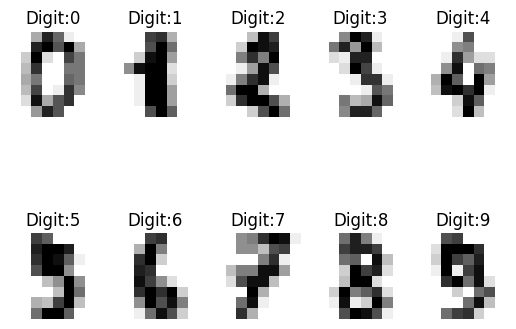

In [12]:
import matplotlib.pyplot as plt
import random
from sklearn import datasets, tree
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score

# 손글씨 데이터를 불러옴
digits = datasets.load_digits()

# 이미지를 표시함.
for label, img in zip(digits.target[:10], digits.images[:10]):
    plt.subplot(2, 5, label+1) # 각각의 글씨 표현을 위해 2행 5열의 subplot을 만듬
    plt.axis('off') # 축 삭제
    plt.imshow(img, cmap=plt.cm.gray_r, interpolation='nearest') # 이미지 표시
    plt.title('Digit:{0}'.format(label)) # 제목 표시
plt.show()

In [24]:
# 1798 개의 손글씨 데이터를 데이터(x)와 결과(y)로 나눠 저장
images = digits.images
labels = digits.target

# 8*8 이미지 * 1797개를 64 픽셀 벡터 * 1797개로 변환
images = images.reshape(images.shape[0], -1)

# 훈련 데이터와 테스트 데이터로 분리
n_samples = len(images) # 샘플 수
train_size = int(n_samples * 2 / 3) # 훈련 데이터 수(전체 샘플 수의 2/3, 1198)
classifier = tree.DecisionTreeClassifier(max_depth=3) # DCM 생성, depth는 3으로 설정
classifier.fit(images[:train_size], labels[:train_size]) # 훈련 데이터로 모델 훈련

# 테스트 데이터로 예측
expected = labels[train_size:]
predicted = classifier.predict(images[train_size:])

# 정확도 측정
print('Accuracy:\n', accuracy_score(expected, predicted))

# 오차 행렬(혼돈 행렬), 출력 결과가 대각선 방향으로 높은 값이 나오는 것이 좋음
print('Confusion matrix:\n', confusion_matrix(expected, predicted))

Accuracy:
 0.44908180300500833
Confusion matrix:
 [[57  0  1  0  1  0  0  0  0  0]
 [ 0  0 25 16  6  0  0 15  0  0]
 [ 1  0 49  6  0  1  0  3  0  0]
 [ 0  0 10 46  0  0  0  5  0  1]
 [ 4  0 27  0 30  0  0  1  0  0]
 [ 0  0  2 29 20  5  0  3  0  0]
 [ 0  0 55  5  0  1  0  0  0  0]
 [ 0  0  0  0  6  0  0 55  0  0]
 [ 0  0 33  6  2  1  0 13  0  0]
 [ 2  0  1 21  7  0  0  0  0 27]]


In [26]:
# 최적의 깊이를 찾기 위한 반복적인 fitting 실행
score_list = []
for depth in range(1,100):
    dtr = tree.DecisionTreeClassifier(max_depth=depth)
    dtr.fit(images[:train_size], labels[:train_size])
    score_list.append(dtr.score(images[:train_size], labels[:train_size]).round(4))

# 확인된 최적 깊이와 그 때 fitting score 확인
opt_depth = score_list.index(max(score_list))+1

# 최적의 깊이를 갖는 트리 모델 생성 및 훈련
classifier_opt = tree.DecisionTreeClassifier(max_depth=opt_depth)
classifier_opt.fit(images[:train_size], labels[:train_size])

# 테스트 데이터로 예측
expected = labels[train_size:]
predicted = classifier_opt.predict(images[train_size:])

# 정확도 측정
print('Accuracy:\n', accuracy_score(expected, predicted))

# 오차 행렬
print('Confusion matrix:\n', confusion_matrix(expected, predicted))

Accuracy:
 0.7746243739565943
Confusion matrix:
 [[57  0  0  0  2  0  0  0  0  0]
 [ 0 38  1  6  7  0  0  2  5  3]
 [ 1  1 46  5  0  0  1  0  5  1]
 [ 0  0  2 48  2  2  0  0  4  4]
 [ 0  2  0  0 51  5  2  2  0  0]
 [ 0  0  1  1  1 46  2  2  2  4]
 [ 0  1  1  0  6  6 46  0  1  0]
 [ 0  1  0  3  1  1  0 53  1  1]
 [ 0 11  2  1  2  8  0  2 28  1]
 [ 2  1  0  0  1  2  0  0  1 51]]


**_Decision Tree Model 예시 코드 1  종료_**

---

---
#### 코드블럭3
**_Decision Tree Model 예시 코드 2 시작_**<br/>
붓꽃(Iris)의 4가지 특징 데이터를 분석하여 각 붓꽃을 적절한 종으로 분류하는 Decision Tree Model의 실습 코드

In [ ]:
from sklearn import datasets
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
import numpy as np

iris = datasets.load_iris() # 붓꽃 데이터 불러오기

**참고**
* Iris flower dataset은 대표적인 머신 러닝과 패턴 인식 분야에서 사용되는 유명한 데이터셋 중 하나입니다.
* 이 데이터셋은 통계학자인 Ronald Fisher에 의해 소개되었으며, 아이리스라는 세 종류의 붓꽃에 대한 측정값을 포함하고 있습니다.
* 전체 데이터셋은 150개의 샘플로 이루어져 있으며, 각각의 꽃마다 4개의 특성(꽃받침의 길이와 너비, 꽃잎의 길이와 너비)을 가지고 있습니다.
* 이 데이터셋은 머신 러닝의 기초적인 예제로 많이 활용되며, 데이터 시각화, 분류, 군집화 등의 다양한 머신 러닝 기술을 학습하거나 테스트하는 데 자주 사용됩니다.
* 데이터셋에는 아래와 같은 정보가 포함되어 있습니다:
    * 꽃받침(sepal)의 길이(length)와 너비(width)를 측정한 값(SL, SW)
    * 꽃잎(petal)의 길이(length)와 너비(width)를 측정한 값(PL, PW)
    * 꽃의 종류(세 종류의 아이리스 꽃: Setosa, Versicolor, Virginica)

* Iris flower data set? https://en.wikipedia.org/wiki/Iris_flower_data_set

In [ ]:
iris.data[:3] # iris 데이터(꽃의 SL, SW, PL, PW 측정값)의 0~2번째 데이터 출력

In [ ]:
iris.target[:3] # 타겟 데이터(꽃의 종류)의 0~2번째 데이터 출력

In [ ]:
clf = DecisionTreeClassifier(random_state=0) # Classify 형식의 DTM 생성

In [ ]:
# 모델 성능 평가를 위한 교차 검증 실시 및 정확도 측정, cv=10: 교차 검증 횟수를 10회로 설정
cross_val_score(clf, iris.data, iris.target, cv=10)

**교차 검증**

* 교차 검증은 데이터 내에서 랜덤으로 선택된 훈련/검증 데이터로 모델을 생성하고 해당 모델을 검증하는 과정을 반복하는 것
* 교차 검증 과정 중 0.9 이상의 값이 나온다면, 해당 데이터의 예측에 DTM을 사용해도 된다는 것을 의미
* 교차 검증은 일반적으로 100개 이하의 데이터에서는 검증 횟수를 10회 정도로 잡으며, 데이터양이 늘어날 수록 적절히 교차 검증 횟수를 늘려 나가야 검증 효율이 올라감
* 단, 데이터의 양이 적을 때 검증 횟수를 늘릴 경우, 모델의 성능이 저하될 수 있음

In [ ]:
# 모델 훈련 및 훈련된 모델을 사용하여 각 꽃의 [SL, SW, PL, PW] 값을 입력하면 해당 꽃의 종류를 출력
clf.fit(iris.data, iris.target)
clf.predict(iris.data[:3])

In [ ]:
# 예측 결과와 실제 결과 비교
iris.target == clf.predict(iris.data)

In [ ]:
# 생성된 DTM의 정확도 계산
np.mean(iris.target == clf.predict(iris.data)) 

**_Decision Tree Model 예시 코드 2 종료_**

---

### `4-2.Regression Analysis`

* 회귀 분석은 산점도(Scatter Plot)에서 원래의 점 데이터와 가장 오차가 적은 선을 찾는 지도 학습을 의미

* 오차의 측정법:(편차(잔차, 실제값 - 예측값)일 때)
    * 절대값 거리 = abs(편차)
    * 민코프스키 거리 = sum{(편차)**n}^(1/n)
    * 제곱 거리 =(편차)**2

* 오차 함수(비용 함수, Error function, Cost function)
    * 편차 제곱의 합

* 적합도가 높은 선을 찾기 위해 = 오차(비용)가 낮은 선을 찾기 위해, 최소제곱법(Least Square Method)을 사용하여 모델을 구함
    * 사회 과학 영역에서는 직선형 회귀 모델을 많이 사용하고, 자연 과학 영역에서는 비선형 회귀 모델을 많이 사용함

* Regression Model의 분류
    * Linear vs Nonlinear
        * 직선형 회귀(Linear Regression): y vs x 가 일차식 모양으로 이뤄짐
        * 비선형 회귀(Nonlinear Regression): 직선형 회귀를 제외한 모든 모형
    * Simple vs Multiple
        * 단순 회귀(Simple Regressino): 독립 변수가 1개
        * 다중 회귀(Multiple Regression): 독립 변수가 2개 이상

* Regression Model의 평가
    * 결정 계수(R2, R-squared)
        * Regression Model의 성능 평가를 위한 기본적 지표
        * 일반적으로 0~1 사이에 분포하고, 1에 가까울 수록 완벽한 예측
            * 실제 모델에 대해서 70% 이상 정도일 경우 뛰어난 성능의 Model로 평가(from 김화종 교수님 자료)
            * 사회 과학 영역에서는 60%, 자연 과학 영역에서는 90% 이상일 경우 쓸만한 Model로 평가하고 일반적으로는 70% 이상은 되어야 쓸만한 Model이라는 주관적 평가 가능(from MySUNI 머신러닝 이해와 실습 상)
    * F-value & P-value
        * Regression Model의 신뢰도를 통계적으로 평가하기 위해 사용하는 지표
        * F-value는 값이 클수록 신뢰도가 높음
        * P-value는 0.05 또는 0.01 보다 작아야 안정된 것으로 평가함
        * F-value와 P-value는 일반적으로 반비례함
    * T-value
        * Regression Model의 계수 신뢰도를 평가하는 지표
        



##### 회귀 모델의 성능 평가
- 선형 회귀를 포함한 회귀 모델의 성능을 평가하는 지표로 다음과 같은 수치들을 확인함
    - MAE(Mean Absolute Error, 편차 절대값의 평균)
    - MSE(Mean Squared Error, 편차 제곱의 평균) 
    - RMSE(Root Mean Squared Error, 편차 제곱의 평균의 제곱근)
        - 위 3개 지표는 편차(= 예측 - 실측)을 평가하는 지표
        - 편차의 음수/양수 분포로 인한 상쇄 영향을 줄이기 위해 절대값(MAE) 또는 제곱(MSE)을 사용하거나, 다시 제곱으로 인한 과대평가 가능성을 줄이기 위해 제곱근을 적용한 지표(RMSE)
    - R-Sqaured(R2)
        - 회귀 모델의 성능 평가를 위한 기본적인 지표
        - MSE를 분산으로 정규화한 값을 사용
        - 일반적으로 0~1 사이에 분포하며, 1에 가까울 수록 완벽한 예측
            - 실제 모델에 대해서는 70% 이상만 되어도 꽤 뛰어난 성능의 예측 모듈로 평가함
        - 음수도 나올 수 있음

---
**Regression Model 예시 코드 1 시작**

Nonlinear Regression을 테스트하기 위한 가상 Model

In [ ]:
from sklearn import linear_model
import matplotlib.pyplot as plt
import numpy as np


# Nonlinear Regression Model 생성을 위한 임의의 데이터 및 결과 생성
# 데이터 생성을 위해 -10 ~ +10 까지 0.02 간격으로 1000개의 숫자 생성 후 1,000 X 1 형태의 2차원 배열로 변환
values = np.arange(-10, +10, 1/50).reshape(-1,1) 


#(가상의) 실측 데이터 생성을 위해 vals 데이터에 대한 결과값 생성, y = x^2 + noise(noise는 표준 정규 분포를 따름), 데이터 생성 후 1,000 X 1 형태의 2차원 배열로 변환 
y_val = values**2 + np.random.randn(len(values),1) * 30


# vals vs y_val 시각화
plt.scatter(values, y_val, c="black",s=30,marker="x",label="y_val")
plt.legend()
plt.show()

In [ ]:
### Case 1. values만 특성으로 사용한 훈련 ###

# Linear Regression Model 생성
model = linear_model.LinearRegression()


# 모델 훈련 및 예측 결과 도출(훈련 데이터: values, 훈련 결과: y_val)
model.fit(values, y_val) 
y_pred1 = model.predict(values)


# 예측 결과를 시각화
plt.plot(values, y_pred1, linestyle="--", color="red", label="Sample") # y_pred1을 선으로 표시
plt.scatter(values, y_val, c="black",s=30,marker="x",label="Sample Data") # y_val을 산점도 형태로 표시
plt.legend()
plt.show()


# 훈련된 모델의 가중치 확인
print(model.coef_) # 가중치 출력
print(model.intercept_) # 절편 출력
print(model.score(values, y_val)) # 모델의 정확도 출력, 결정 계수(R^2) 출력

* 여러 특성을 고려해야 하는 상황에서 Case 1과 같이 한 개의 특성만 사용한 Linear Regression을 진행할 경우 매우 부정확한 모델이 생성됨, R^2 << 0.7

In [ ]:
### Case 2. values**2와 values 두 가지 특성을 포함한 훈련 ###

# Linear Regression Model 생성
model = linear_model.LinearRegression()


# np.c_ 함수를 통해 values**2 특성과 values 특성 데이터를 결합하여 1,000 X 2 형태의 2차원 배열로 변환, c_ = concatenate
x_train = np.c_[values**2, values]


# 모델 훈련 및 예측 결과 도출(훈련 데이터: x_train, 훈련 결과: y_val)
model.fit(x_train, y_val) 
y_pred2 = model.predict(x_train)


# 예측 결과를 시각화
plt.plot(values, y_pred2, linestyle="--", color="red", label="Sample") # y_pred2을 선으로 표시
plt.scatter(values, y_val, c="black",s=30,marker="x",label="Sample Data") # y_val을 산점도 형태로 표시
plt.legend()
plt.show()


# 훈련된 모델의 가중치 확인
print(model.coef_) # 가중치 출력
print(model.intercept_) # 절편 출력
print(model.score(x_train, y_val)) # 모델의 결정 계수(R^2) 출력

**Regression Model 예시 코드 1 종료**

---

---
**Regression Model 예시 코드 2 시작**

당뇨병 환자 데이터에 대한 Regression Model

In [ ]:
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score


# 데이터 불러오기, 당뇨 환자 442명의 10 가지 특성 ["age", "sex", "bmi", "bp", "s1", "s2", "s3", "s4", "s5", "s6"]의 Scaling Data vs 혈당 측정치 데이터
diabetes = datasets.load_diabetes()


# 데이터 확인
print(f"Shape= {diabetes.data.shape}\n") # 데이터 형태 확인
print(f"Sample Data[:3]= {diabetes.data[:3]}\n") # 상위 3명의 환자 데이터 출력
print(f"Sample Data Length= {len(diabetes.data)}\n") # 환자 수 출력

In [ ]:
# 훈련 데이터 및 훈련 결과 지정
diabetes_x = diabetes.data[:,2].reshape(len(diabetes.data),1) # 3열 데이터("bmi")만 사용하여 2차원 배열로 변환, 데이터
diabetes_y = diabetes.target.reshape(len(diabetes.target),1) # 타겟 데이터("환자의 혈당치")를 2차원 배열로 변환, 결과

In [ ]:
# 전체 데이터 중 20개를 검증 데이터로 사용, 나머지를 훈련 데이터로 사용
diabetes_x_train = diabetes_x[:-20] # 훈련 데이터의 0~422번째 데이터를 사용
diabetes_x_test = diabetes_x[-20:] # 검증 데이터의 423~442번째 데이터를 사용

diabetes_y_train = diabetes_y[:-20] # 훈련 결과의 0~422번째 데이터를 사용
diabetes_y_test = diabetes_y[-20:] # 검증 결과의 423~442번째 데이터를 사용

In [ ]:
# 모델 생성 및 훈련
model = linear_model.LinearRegression()
model.fit(diabetes_x_train, diabetes_y_train)


# 검증 데이터를 사용하여 예측 결과 도출
diabetes_y_pred = model.predict(diabetes_x_test)

In [ ]:
# 모델의 가중치 확인
print("Coefficients: ", model.coef_) # 가중치 출력
print("Intercept: ", model.intercept_) # 절편 출력
print("Mean squared error: %.2f" % mean_squared_error(diabetes_y_test, diabetes_y_pred)) # MSE 출력
print("Coefficient of determination: %.2f" % r2_score(diabetes_y_test, diabetes_y_pred)) # R^2 출력


# 예측 결과와 검증 결과를 시각화(bmi 지수와 혈당치 사이의 상관 관계)
plt.scatter(diabetes_x_test, diabetes_y_test, color="black")
plt.plot(diabetes_x_test, diabetes_y_pred, color="blue", linewidth=3)
plt.xticks(()) 
plt.yticks(()) 
plt.show()

**Regression Model 예시 코드 2 종료**

---

### `4-3.Clustering Analysis`

* k 개의 변수가 포함된 변수가 있을 때 각각의 변수 간 거리를 행렬로 나타내면 k X k 행렬이 생성됨(거리 행렬)

* 데이터 거리: Data와 Data 사이의 거리
    * 거리가 무엇인지 정확히 정의해야 함
    * 예를 들어, 
        * 유클리드 거리(Euclidean distance): 수학적인 두 점 사이의 거리
            <img src="">
        * 맨하튼 거리(Manhattan distance, 택시 거리, L1 거리, 시가지 거리, Taxicab geometry)): 두 점 사이의 절댓값 차이에 따른 새로운 거리
            <img src="">
        * 민코프스키 거리(Minkowski distance): 민코프스키 거리는 일반 상대성 이론에서 사용되는 거리 개념으로, 민코프스키 공간에서 두 지점 사이의 거리

* 군집 분석의 세 종류

    * Dendrogram: 거리 행렬을 통해 데이터 포인트를 모두 계산, 계층형 군집 분석
        
        다음과 같은 항목을 확인할 수 있음
        * 어느 데이터간 거리가 가까운지
        * 군집이 어떤 식으로 형성되는지
        * 몇 개의 군집이 있는지
        <img src="">

        다음과 같은 특징이 있음
        * 많은 메모리가 필요함
        * 대체적으로 큰 규모의 데이터에서는 사용이 어려움
        * 전반적인 군집의 패턴 확인에 용이하여 사전 분석 용도로 적합함

    * k-means(k개의 평균): 데이터 간의 평균 벡터 이용, 평균 계산을 사용하여 군집 계산, 비계층형 군집 분석
        
        다음과 같은 방식으로 진행함
        1. 임의의 k개 점을 Cluster Centor로 가정(k는 유저가 적절히 선택, 단, 시각화나 EDA를 통해 효율적인 k를 설정할 수는 있음)
        2. 해당 점과 나머지 데이터 간의 거리를 구하고 거리에 따라서 가장 가까운 Cluster Centor의 Cluster에 포함(총 k개의 Cluster)
        3. 각 Cluster 내의 평균 벡터(Cluster Centor)를 다시 구함
        4. 2~3을 반복
        5. 기존 Cluster Centor와 새로운 Cluster Centor의 변화가 없을 때 Clustering이 완료됨
        
        다음과 같은 특징이 있음
        * 원 형태의 군집 데이터에 최적화 되어 있어 길쭉한 형태의 군집은 잘 잡아내지 못함
        * 이해와 구현이 쉬워 오랫동안 사용되고 있는 알고리즘 방식

    * DBSCAN(Density-based): 밀도가 높은 부분을 군집으로 평가, 밀도가 높을수록 군집 형성, 비계층형 군집 분석
        
        다음과 같은 특징이 있음
        * 길쭉한 형태의 군집도 잘 잡아냄
        * 노이즈(어느 군집에도 속하지 못한 데이터)를 자동으로 잡아낼 수 있음

* 양 Cluster 간 거리 계산법
    * 최단 연결법(Single Linkage): 두 Cluster 내 데이터 간 거리 중 최소값
    * 최장 연결법(Complete Linkage): 두 Cluster 내 데이터 간 거리 중 최대값
    * 평균 연결법(Average Linkage): 두 Cluster 내 모든 데이터 간 거리의 평균값
    * 중심 연결법(Centroid Linkage): 각 Cluster의 중심(평균) 간 거리
    * 워드 연결법(Ward Linkage): 두 Cluster의 오차제곱합 중 작은 쪽과 두 Cluster를 하나로 합쳤을 때 오차제곱합의 차를 거리로 설정

* 군집 분석은 Target이 없는 Data Set을 통해 훈련하는 것으로 데이터 내에서 패턴을 찾는 비감독학습(비지도학습)임

---
**Clustering - k-means analysis 예시 코드 1 시작**

붓꽃(Iris) 데이터에 대한 Clustering Model

In [ ]:
import matplotlib.pyplot
from sklearn import datasets, cluster

# iris 데이터 불러오기
iris = datasets.load_iris()
data = iris["data"]

# K-Means Clustering 모델 생성 및 훈련
model = cluster.KMeans(n_clusters=3)
model.fit(data)

# 훈련 결과 확인
print(model.labels_) # 각 데이터의 군집 번호 출력

# 군집별로 데이터를 분류하여 저장
cluster1 = data[model.labels_ == 0]



---

## `5.데이터 전처리(Data Preprocessing)`
- ML 모델 구현을 위해 원시 데이터(Raw Data)를 그대로 사용할 경우 원하는 모델을 구현할 수 없거나, 구현하더라도 정확도가 떨어질 수 있음
- 이러한 오류를 방지하기 위해 데이터의 정제 과정이 필요하고 이러한 과정을 데이터 전처리라고 부름
- 데이터를 처리하는 방법에는 다음과 같은 것들이 존재함
    1. 데이터 랭글링(Data Wrangling, 데이터 먼징, Data Munging)
    2. 데이터 클리닝(Data Cleaning)
    3. 이상치 처리(Outlier Handling):
    4. 데이터 변환(Data Transformation)
    5. 스케일링(Scaling)

### `5-2. 데이터 클리닝(Data Cleaning)`
- 데이터가 없거나(결측치, Missing Data) 틀린 값(Error)이 포함되어 있는 데이터는 다음 방법으로 처리함
    - 해당 값이 포함된 샘플을 버린다.
    - 해당 값을 적절한 값으로 대체한다.
    - 해당 값을 그대로 두고 다음 분석 단계에서 처리한다.

### `5-3.이상치 처리(Outlier Handling)`
- 데이터의 경향성에서 벗어나 있는 데이터는 분석의 정확도를 떨어뜨리므로 다음 방법으로 처리함
- 이상치 탐지 방법
    - 단변수 일 때
        - 표준 편차가 n 이상인 값을 처리한다.(n의 값은 분석하는 사람이 적절히 정한다.)
        - 실제 데이터를 통해 이상치를 파악한다.
    - 다변수 일 때
        - 주성분 분석(Pricipal Component Analysis, PCA)을 통해 찾는다.

`상자 수염 그림의 이상치`
1. 사분위수(Quartile, Q) 확인
    > 사분위수란? 전체 데이터를 4등분 하는 위치에 있는 데이터
    <br/>Q3 = 전체 데이터의 상위 25% 데이터
    <br/>Q2 = 전체 데이터의 상위 50% 데이터
    <br/>Q1 = 전체 데이터의 상위 75% 데이터
2. 사분위수 범위 확인(Interquartile Range, IQR)
    > 사분위수 범위란? 전체 데이터 중 중앙 50% 데이터의 구간
    <br/>IQR = Q3 - Q1
3. 이상치 한계 확인
    > 이상치 한계란? 아래의 범위 양 끝을 이상치 한계로 정의하며, 구간을 벗어나면 이상치로 처리
    <br/>하위 이상치 한계(Q1 - 1.5 * IQR) ~ 상위 이상치 한계(Q3 + 1.5 * IQR)
4. 해당하는 이상치를 제거
    
<img src="https://github.com/imbiotech/K-PDA_GMP_W-S/blob/main/Outlier.png?raw=true" align='left' width=700>

#### `5-4.데이터 변환(Data Transformation)`
- 데이터의 상관 관계를 명확히 하기 위해서 데이터를 특정 형태로 변환하여 분석하는 방법
- 다음과 같은 변환을 사용함
    - 카테고리 인코딩: 하나의 숫자로 표현되어 있지 않은 데이터를 하나의 숫자로 변환하여 분석하는 방법
        - 원 핫 인코딩: 국적, 성별, 계절 등 카테고리를 구분하는 변수를 변환하는 방법
            - 예를 들어 봄은 1, 여름은 2, 가을은 3, 겨울은 4로 변환하여 분석
        - 연령대, 옷 사이즈 등 연속형 변수를 카테고리 인코딩 할 수도 있음
            - 10 대는 1, 20 대는 2, 30 대는 3 등
    - 로그 변환: x 대신 log(x)를 사용
    - 역수 변환: x 대신 1/x를 사용
    - 다차항 변환(Polynomial trnansformation): x 대신 x^2 이나 x*y를 사용
    - 비율값 사용: x 대신 x/y를 사용
    - 새로운 값 정의: 특정 값 체계를 만들어서 변환
        - BMI = 몸무게 / 키**2

#### `5-5.스케일링(Scaling)`
- 여러 변수의 범위가 서로 다른 경우 분석에서 동일한 비중으로 반영하기 위해서는 동일한 범위를 갖도록 변환해야 함
    - Scaling 과정을 거치지 않을 경우에는 데이터 가중치 측면에서 수치가 작은 변수는 과대평가되고 수치가 큰 변수는 과소평가되는 현상이 발생함
- 다양한 스케일링 방식이 존재하며 일반적으로 평균을 0, 표준 편차가 1이 되도록 변환하는 표준 스케일링(Standard Scaling)을 가장 많이 사용함
- 값의 최소치와 최대치가 정해진 경우는 최소치를 0, 최대치를 1로 변환하는 min-max Scaling도 자주 사용함

### `6.성능 평가`
- 작성된 머신 러닝 모델이 원하는 작업을 잘 수행하는지 평가하는 값
- 주요 평가 척도
  - 회귀 모델에서의 R-sqared(R^2)
  - 분류 모델에서의 정확도(Accuracy), 정밀도(Precision), 리콜(Recall), f-1 점수, ROC-AUC 등

### `7.최적화기`
- 학습을 통해 모델 파라미터를 최적의 값으로 수렴시키는 알고리즘
- 일반적으로 경사 하강법(Gradient descent, GD)이 사용됨

### `8.손실 함수(Loss function)`
- 최적화기를 통해 손실 함수를 최소화하는 방향을 추구
- 손실 함수를 통해 최적화기의 동작이 잘 이뤄지는지를 평가할 수 있음
- 손실 함수의 종류
  - 회귀 모델에서의 평균 제곱 오차(Mean square error, MSE)
  - 분류 모델에서의 교차 엔트로피(Cross entropy, CE)

---
---
---

# 파이썬과 내부 사례 데이터를 활용한 간단한 머신 러닝 프로그램 구현

## 사례 1. A 제품 수율 예측
- 대상 제품 및 공정: A 제품의 a 공정 및 b 공정
- 분석 개요: 공정 중 몇 가지 파라미터 p1, p2... 의 변화에 따른 수율 영향성을 평가하고, 수율을 예측

### 데이터 준비
- 본 케이스 스터디에서 다룰 데이터는 2가지 테이블로 다음과 같음
  - 배치 번호, 공정, 기기 번호, 작업 시간의 데이터를 담은 테이블
  - 계측 시간 및 계측 번호에 따른 계측값 데이터를 담은 테이블
- 데이터는 WMS와 BAS를 통해 추출하였으며, 각 데이터 마다 적절한 1 차 sorting을 통해 불필요한 데이터를 정제한 상태임

- 이 데이터를 pandas 라이브러리에서 제공하는 read_csv() 함수를 사용하여 읽어온 후 분석에 사용할 예정
- pandas의 read_csv() 함수는 csv 파일의 데이터를 읽어와 데이터 프레임(Dataframe, DF)의 형태로 출력함
  - DF는 행과 열로 구성된 2 차원 테이블 구조의 데이터
  - 엑셀과 비슷한 기능을 수행할 수 있음

#### CSV란?
- 쉼표(,)로 구분된 데이터 값(Comma-Separated Values)이 담긴 파일 형식
- 단순한 텍스트 형식의 데이터 값으로 웹 페이지, 메모장, 엑셀 등등 어느 프로그램으로도 읽어올 수 있는 장점이 있음
- 꼭 쉼표가 아니더라도 공백( )이나 세로 선(|) 등 특정 기호로 나눠져 있는 모든 데이터 파일을 의미

### 실행 코드

---
아래에 보이는 각각의 코드 블록은 순차적으로 실행하는 방식

위쪽의 코드 블록을 실행하지 않으면 아래쪽을 실행하는 과정에서 오류가 발생할 수 있음

---

In [ ]:
# 데이터프레임 기능을 사용하기 위한 pandas 라이브러리를 pd라는 이름으로 호출
import pandas as pd


# ipc_data의 주소 설정 및 ipc_df라는 이름으로 변수 선언
ipc_data_address = "https://raw.githubusercontent.com/imbiotech/K-PDA_GMP_W-S/main/ipc_data.csv"
ipc_df_origin = pd.read_csv(ipc_data_address)


# 데이터 확인
ipc_df_origin[:3]

In [ ]:
# Real Column과 Exp Column을 사용하여 Real Column 생성 후 기존 데이터 삭제
if "Real" in ipc_df_origin.columns:
    ipc_df_origin["Result"] = round(ipc_df_origin["Real"]/ipc_df_origin["Exp"]*100,2)
    ipc_df_origin.drop(["Exp","Real"],axis=1,inplace=True)

In [ ]:
# Training Set과 Validation Set을 분리
ipc_df_trn = ipc_df_origin[:112]
ipc_df_val = ipc_df_origin[112:]

In [ ]:
# Training Set 데이터 확인
ipc_df_trn[:3]

In [ ]:
# Validation Set 데이터 확인
ipc_df_val[:3]

In [ ]:
# 특성 컬럼 지정, 해당 컬럼에 있는 값들이 데이터(X)로 사용됨
features = ipc_df_trn.columns[1:7]


# 데이터 전처리를 진행하기 전에 훈련 데이터(x)와 훈련 타겟(y) 사이의 상관 계수를 확인
# 확인 시 오름 차순 정렬하고, 소수점 두 자리까지만 표기
ipc_df_trn[features].corrwith(ipc_df_trn["Result"]).sort_values(ascending=True).round(2)

* Correlation의 절대값이 0에 가까울 수록 상관도가 낮은 값
* Correlation의 절대값이 1에 가까울 수록 상관도가 높은 값
    - 1에 가까울 수록 양의 상관 관계
    - -1에 가까울 수록 음의 상관 관계

- 다만 현재 데이터는 별도의 전처리를 거치지 않았기 때문에 상관 수치에 오류가 있을 수 있음
- 전처리를 거친 후 다시 분석

In [ ]:
# 각 feature마다 별도의 상자 수염 그림을 그리는 함수, y 축은 자동 조정
def boxplot_features(features,dataframe):
    for feature in features:
        dataframe.boxplot(column=feature,figsize=(5,5))
        plt.title(feature)
        plt.ylabel(feature)
        plt.show()

In [ ]:
# ipc_df_trn 내부 데이터 중 이상치(outlier)를 확인
import matplotlib.pyplot as plt
import seaborn as sns

boxplot_features(features,ipc_df_trn)

In [ ]:
# 이상치 제거
Q1 = ipc_df_trn[features].quantile(0.25)
Q3 = ipc_df_trn[features].quantile(0.75)
IQR = Q3 - Q1
ipc_df_trn = ipc_df_trn[~((ipc_df_trn[features] <(Q1 - 1.5 * IQR)) |(ipc_df_trn[features] >(Q3 + 1.5 * IQR))).any(axis=1)]
# ipc_df_trn[features] <(Q1 - 1.5 * IQR) : Q1 - 1.5 * IQR 보다 작은 값들을 True로 반환
# ipc_df_trn[features] >(Q3 + 1.5 * IQR) : Q3 + 1.5 * IQR 보다 큰 값들을 True로 반환
#(ipc_df_trn[features] <(Q1 - 1.5 * IQR)) |(ipc_df_trn[features] >(Q3 + 1.5 * IQR)) : 두 조건 중 하나라도 True인 값들을 True로 반환
# ~((ipc_df_trn[features] <(Q1 - 1.5 * IQR)) |(ipc_df_trn[features] >(Q3 + 1.5 * IQR))) : 두 조건 중 하나라도 True인 값들을 False로 반환
# ipc_df_trn[~((ipc_df_trn[features] <(Q1 - 1.5 * IQR)) |(ipc_df_trn[features] >(Q3 + 1.5 * IQR)))] : 두 조건 중 하나라도 True인 행들을 제거


# 이상치 제거 후 데이터 확인
boxplot_features(features,ipc_df_trn)

* 각 상자 수염 그림을 확인했을 때 이상치들이 존재하고 있으며 데이터 클리닝을 위해 해당 이상치 데이터를 버림

In [ ]:
# 상관 수치 재분석
ipc_df_trn[features].corrwith(ipc_df_trn["Result"]).sort_values(ascending=True).round(2)

▼ 기존 데이터

<img src="https://github.com/imbiotech/K-PDA_GMP_W-S/blob/main/Correlation_Original.png?raw=true" align='left'>

- 이상치 제거 전 데이터의 상관 관계 수치 대비 변동이 존재
- p3, p4, p1 대비 p2, p5, p6는 상관 관계가 거의 없는 것으로 판단됨

In [ ]:
# plot 상태 변화를 확인하기 위해 ipc_df_trn을 복제
ipc_df_trn_copy = ipc_df_trn.copy()


# Result의 순서대로 나열하여 그래프를 그리기 위해 Result를 index로 설정
if ipc_df_trn_copy.index.name != "Result":
    ipc_df_trn_copy.set_index("Result",inplace=True)
    ipc_df_trn_copy.sort_index(ascending=True,inplace=True)


# 각 데이터(x) vs 타겟(y) 에 대한 그래프 작성
for f in features:
    plt.figure(figsize=(10, 3))
    ipc_df_trn_copy[f].plot()
    plt.ylabel(f)
    plt.show()


# 사용이 끝난 변수 삭제
del ipc_df_trn_copy

- StandardScaler 모듈의 fit_transfer / fit / transfer함수를 사용하면 다음과 같은 작업이 진행됨
    - fit: 각 컬럼의 데이터를 토대로 평균과 분산을 구하고 저장함
    - transfer: 각 컬럼의 평균과 분산 데이터를 통해 데이터를 Standard Scaling 함
 
- Training Set에서 Fit을 통해 평균과 분산을 구하고 해당 값으로 Training Set 및 Validation Set에 대한 Transform을 진행해야 함
    - Fit: Training Set에 대해서만 진행
    - Transform: Training Set에 대한 평균과 분산으로 두 개 Set에 모두 적용

In [ ]:
# Standard Scaling을 적용하기 위해 scikit-learn 라이브러리의 preprocessing 모듈에서 StandardScaler 함수를 호출
from sklearn.preprocessing import StandardScaler
S_Scaler = StandardScaler()


# Scaling 전 Training Set 확인
print("Scaling 진행 전 Training Set")
print(ipc_df_trn[features][:3])


# Scaling 및 Scaling 후 Training Set 확인
ipc_df_trn[features] = S_Scaler.fit_transform(ipc_df_trn[features])
print("\nScaling 진행 후 Training Set")
print(ipc_df_trn[features][:3])

In [ ]:
# Scaling 전 Validation Set 확인
print("Scaling 진행 전  Validation Set")
print(ipc_df_val[features][:3])


# Scaling 및 Scaling 후 Validation Set 확인
ipc_df_val[features] = S_Scaler.transform(ipc_df_val[features])
print("\nScaling 진행 후 Validation Set")
print(ipc_df_val[features][:3])

- 검증 과정에서는 다음과 같은 절차를 진행
    1. Training Set의 p1~p6(x_train)와 Result(y_train)사이의 관계를 통해 ML Model의 훈련을 진행한다.
    2. 훈련이 끝난 ML Model을 사용하여 Validation Set의 p1~p6(x_val) 데이터로부터 예측 결과(y_pred)를 추출한다.
    3. Validation Set의 실제 결과(y_val)와 예측 결과(y_pred)를 사용하여 Model의 정확도를 평가한다.

#### 회귀 모델(Regression Model)

In [ ]:
# 데이터 전처리 완료 및 모델 훈련 시작
# 훈련 데이터(x_train) 및 훈련 결과(y_train) 지정
x_train = ipc_df_trn[features]
y_train = ipc_df_trn["Result"]

print(x_train[:3])
print(y_train[:3])

In [ ]:
# 검증 데이터(x_val) 및 검증 결과(y_val)지정
x_val = ipc_df_val[features]
y_val = ipc_df_val["Result"]


# y_val의 index 초기화, 초기화 하지 않으면 112 번부터 index가 시작됨
y_val.reset_index(drop=True,inplace=True)
y_val

In [ ]:
# 선형 회귀 함수를 호출하고 lin이라는 변수로 지정
from sklearn.linear_model import LinearRegression
lin = LinearRegression()


# 훈련 데이터 및 결과(x_train, y_train)를 사용하여 선형 회귀 fitting 진행
lin.fit(x_train,y_train)


# fitting 된 모델에 검증 데이터(x_val)를 대입하여 예측 결과(y_pred) 도출
y_pred = lin.predict(x_val)
y_pred

##### 회귀 모델의 성능 평가
- 선형 회귀를 포함한 회귀 모델의 성능을 평가하는 지표로 다음과 같은 수치들을 확인함
    - MAE(Mean Absolute Error, 편차 절대값의 평균)
    - MSE(Mean Squared Error, 편차 제곱의 평균) 
    - RMSE(Root Mean Squared Error, 편차 제곱의 평균의 제곱근)
        - 위 3개 지표는 편차(= 예측 - 실측)을 평가하는 지표
        - 편차의 음수/양수 분포로 인한 상쇄 영향을 줄이기 위해 절대값(MAE) 또는 제곱(MSE)을 사용하거나, 다시 제곱으로 인한 과대평가 가능성을 줄이기 위해 제곱근을 적용한 지표(RMSE)
    - R-Sqaured(R2)
        - 회귀 모델의 성능 평가를 위한 기본적인 지표
        - MSE를 분산으로 정규화한 값을 사용
        - 일반적으로 0~1 사이에 분포하며, 1에 가까울 수록 완벽한 예측
            - 실제 모델에 대해서는 70% 이상만 되어도 꽤 뛰어난 성능의 예측 모듈로 평가함
        - 음수도 나올 수 있음

In [ ]:
# Skit-learn 라이브러리의 Metric 모듈에서 성능 평가를 위한 함수 호출
from sklearn.metrics import mean_absolute_error as MAE, mean_squared_error as MSE, r2_score as R2
import numpy as np


# 검증 결과(y_val)와 예측 결과(y_pred)를 사용한 선형 회귀 모델 평가
def show_regression_result(y_val, y_pred, N=100):
    plt.rc('figure', figsize=(6,4)) # 그래프의 이미지 사이즈를 6 X 4 로 지정
    error = y_pred - y_val # y_pred와 y_val의 차이를 편차(error)로 지정
    print("MAE=", MAE(y_true=y_val,y_pred=y_pred)) # MAE 계산 및 출력
    print("RMSE=", MSE(y_true=y_val,y_pred=y_pred)**0.5) # RMSE 계산 및 출력
    print("R2=",R2(y_val, y_pred)) # R-Squared 계산 및 출력
    print("max error=", max(abs(error))) # Max Error 계산 및 출력

    if N > 0:
      plt.plot(y_val[:N], 'r.-', label='y_val')
      plt.plot(y_pred[:N], 'b.-', label='y_pred')
      plt.legend()
      plt.show()

In [ ]:
show_regression_result(y_val, y_pred, 1000)

In [ ]:
# 가중치를 Horizontal Bar graph로 확인하는 함수
def plot_features_weights(features, weights):
    W = pd.DataFrame({'Weights':weights}, index=features) # 가중치 데이터를 df 형태로 저장
    W = W.sort_values(by='Weights', ascending=True) # 가중치 데이터를 오름 차순 정렬
    W.plot(kind='barh', figsize=(8, 6)) # 가중치 데이터 시각화

In [ ]:
print(sorted(lin.coef_,reverse=True)) # 가중치 데이터 출력

plot_features_weights(x_train.columns, lin.coef_) # 함수 실행

# 예측 결과값(y_pred) 삭제
del y_pred

#### 결정 트리 모델(Decision Tree Model, DTM)

In [ ]:
## 결정 트리를 이용한 이진 분류
# 트리의 깊이를 작게 선택하면 과소적합(under fitting)이 발생한다
# 트리의 깊이를 깊게 선택하면 과대적합(over fitting)이 발생한다
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor as DTR


# 최적 깊이를 찾기 위한 반복적인 fitting 실행
score_list = []
for depth in range(1,100):
    dtr = DTR(max_depth=depth)
    dtr.fit(x_train, y_train)
    print(depth, dtr.score(x_val, y_val).round(4))
    score_list.append(dtr.score(x_val, y_val).round(4))


# 확인된 최적 깊이와 그 때 fitting score 확인
opt_depth = score_list.index(max(score_list))+1
print(f"Optimized Depth: {opt_depth}, Score: {max(score_list)}")

In [ ]:
# 최적의 깊이를 갖는 트리 모델
dtr = DTR(max_depth=opt_depth)
dtr.fit(x_train, y_train)
y_pred = dtr.predict(x_val)

In [ ]:
# 트리 모델 성능 평가
show_regression_result(y_val, y_pred, 1000)

- R2 값이 음수가 나올 정도로 예측 성능이 좋지 않음

In [ ]:
# 트리 모델 특성 중요도 보기
# 특성 중요도: 트리를 나눌때 순도를 높이는데(잘 분류하는데) 많이 기여한 정도를 알려준다
plot_features_weights(x_train.columns, dtr.feature_importances_)


# 예측 결과값(y_pred) 삭제
del y_pred

#### 랜덤 포레스트 모델(Random Forest Model, RFM)

- Random Forest Model은 Decision Forest Model의 성능을 개선한 앙상블 모델임
    - 앙상블 모델은 여러 개의 Training Data Set을 생성하여 Fitting을 함으로써 좀 더 정확한 예측을 도출하는 모델임
    - 이중 RFM은 이름과 같이 Forest 내에서 Tree를 랜덤하게 추출한 작은 Forest(데이터의 일부만 취한 새로운 Training Set, Weak Data)를 만들어 Fitting을 여러번 진행함

In [ ]:
# RFM 호출
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor as RFR
rfr = RFR()


# Training Set을 통한 RFM fitting 및 예측 결과값(y_pred) 도출
rfr.fit(x_train,y_train)
y_pred = rfr.predict(x_val)


# 데이터 시각화
show_regression_result(y_val=y_val,y_pred=y_pred,N=1000)

In [ ]:
# 랜덤 포레스트 모델의 특성 가중치 보기
plot_features_weights(x_val.columns, rfr.feature_importances_)


# 예측 결과값(y_pred) 삭제
del y_pred

#### 부스팅 모델(Boosting Model, BM 또는 Boosting Algorithm, BA)
- Boosting Model은 Decision Forest Model의 성능을 개선한 앙상블 모델임
    - BM은 Forest 내에서 Tree를 순차적으로 추출한 작은 Forest(Weak Data)를 만들어 Fitting을 여러번 진행함

In [ ]:
# Light Gradient BM(LGBM) 모듈 호출
from lightgbm import LGBMClassifier, LGBMRegressor
LGBMr = LGBMRegressor()


# Training Set을 통한 LGBM fitting 및 예측 결과값(y_pred) 도출
LGBMr.fit(x_train,y_train)
y_pred = LGBMr.predict(x_val)


# 시각화
show_regression_result(y_val=y_val,y_pred=y_pred,N=1000)

#### 신경망 모델(Neural Network Model, NNM)
- 인간의 두뇌가 시각 및 청각 정보를 처리하는 방식을 모방한 인공지능 모델
- Training Set의 훈련 데이터(x_train)와 훈련 결과(y_train) 사이의 비선형 관계를 다룰 수 있음
    - 최초 모델 공개 당시에는 단순한 선형 관계 에측만 가능하였기에 논리적 한계가 존재하는 이유로 사장되었으나, 하드웨어 스펙의 상승과 더불어 비선형 결합을 통한 예측이 가능해지며 다시 연구되고 있는 분야
- 입력층(입력 시퀀스, Input Sequence)과 출력층(출력 시퀀스, Output Sequence) 사이에 몇 가지 층위(은닉층, Hidden layer)를 만들어 각각의 요소(세포, Cell)을 무작위 가중치를 부여하여 연결한 뒤 예측값을 출력하는 모델

<img src="https://github.com/imbiotech/K-PDA_GMP_W-S/blob/main/NNM.PNG?raw=true">



##### 장단기 메모리(Long Short Term Memory, LSTM)

* NNM 중 하나인 순환 신경망 모델(Recurrent Neural Network, RNN)은 아래와 같은 방식으로 input(X_t)에 대한 반복 학습 및 예측 후 output(h_t)가 출력됨
    * 반복 과정을 거쳐 상당히 정교한 예측이 가능함
    * 단, 장기간 의존(Long-term dependency), 반복하는 과정 중 생성된 최근 n 개의 데이터만을 토대로 학습을 진행하기 때문에 그보다 더 과거에 생성된 중요 데이터들에 대한 학습이 누락된다는 문제점이 존재
        * 단순히 n 을 늘려서 해결하는 경우 학습해야 하는 데이터 사이즈가 불필요하게 커져 예측의 정확도를 떨어뜨리는 문제가 있음
<img src="https://t1.daumcdn.net/cfile/tistory/9901A1415ACB86A021?original">

* 장단기 메모리(LSTM)은 그러한 한계를 보완하여 설계된 모델
* LSTM은 Samples - time Steps - Features 구조의 입력이 필요함

###### Sequence를 n_step의 크기로 나눠서 샘플을 만듦
- LSTM 모델은 n 번째 Set의 데이터로 n+1 번째 Set의 결과를 예측하므로 해당 마지막 데이터 샘플은 포함하지 않음

<img src="https://github.com/imbiotech/K-PDA_GMP_W-S/blob/main/LSTM.png?raw=true">

- 단, 현재 데이터로 현재를 예측하는 것이 맞는지는 응용에 따라서 점검해야 함

In [ ]:
# numpy 라이브러리를 np라는 이름으로 호출
import numpy as np


# Sequence를 n_steps 사이즈로 나누는 함수
def split_seq(sequence, n_steps):
    x = []
    # Sequence가 30, n이 3일 경우, [0, 1, 2] / [1, 2, 3] / [2, 3, 4] / .... / [28, 29, 30] 으로 분류하여 해당 값을 하나의 2차원 배열(array)로 반환함
    for i in range(len(sequence) - n_steps):
        x.append(sequence[i:i + n_steps])
    return np.array(x)

In [ ]:
# 위 함수를 사용한 배열 구성의 예시

# 0~30까지 숫자를 통해, 순차적으로 3개의 숫자를 포함한 2차원 배열을 만듦
# 마지막 데이터 샘플인 [28, 29, 30] 은 포함되지 않음
x = np.arange(30).reshape(-1,3)

# 10 * 3 크기의 2 차원 배열
# x =  [  [ 0,  1,  2],  [ 3,  4,  5],  [ 6,  7,  8],  [ 9, 10, 11],  [12, 13, 14],  [15, 16, 17],  [18, 19, 20],  [21, 22, 23],  [24, 25, 26],  [27, 28, 29]  ]


# 해당 2차원 배열을 순차적으로 4개씩 묶어 3차원 배열로 반환, 단 마지막 데이터 제외
inp=split_seq(x,4)

# 6 * 4 * 3 크기의 3 차원 배열
# inp =
# [
#     배열 1: x의 0~4번 배열을 하나로 묶은 배열
#     [ 배열 1-1 [ 0,  1,  2], 배열 1-2 [ 3,  4,  5], 배열 1-3 [ 6,  7,  8], 배열 1-4 [ 9, 10, 11] ],
#     배열 2: x의 1~5번 배열을 하나로 묶은 배열
#     [ 배열 2-1 [ 3,  4,  5], 배열 2-2 [ 6,  7,  8], 배열 2-3 [ 9, 10, 11], 배열 2-4 [12, 13, 14] ],
#     ...
#     배열 6: x의 6~9번 배열을 하나로 묶은 배열
#     [ 배열 6-1 [15, 16, 17], 배열 6-2 [18, 19, 20], 배열 6-3 [21, 22, 23], 배열 6-4 [24, 25, 26] ]
# ]

###### 실제 입력 시퀀스(Input Sequence) 만들기

In [ ]:
# 훈련 데이터(ipc_df_trn[features])를 n_steps개 씩 나눠서 input sequence를 생성
n_steps = 20
seq_array = split_seq(ipc_df_trn[features],n_steps)


# 만들어진 3차원 배열의 데이터를 출력
print("Array Shape: ",seq_array.shape) # 90 * 20 * 6 형태의 배열 데이터가 만들어짐
seq_array

# [
#     배열 1: 훈련 데이터의 1~51번째 데이터를 합쳐서 만든 배열
#     [
#         배열 1-1 [-2.520077  ,  0.77039117, -0.60496917, -0.7866208 , 0.52070595, -0.35542961],
#         배열 1-2 [-0.66767217,  0.57187809, -0.60496917,  0.02333417, 0.72791194, -0.2947902 ],
#         ...,
#         배열 1-49 [-0.06759736,  0.351308  ,  0.09124644,  0.17163578, 0.2246974 ,  0.48846879],
#         배열 1-50 [-0.32849945, -0.04571816, -0.60496917, -0.14778308, 0.28389911,  0.80682567]
#     ],
#     배열 2: 훈련 데이터의 2~52번째 데이터를 합쳐서 만든 배열
#     [
#         배열 2-1 [-0.66767217,  0.57187809, -0.60496917,  0.02333417, 0.72791194, -0.2947902 ],
#         ...,
#         배열 2-50 [-0.32849945, -0.04571816, -0.60496917, -0.14778308, 0.28389911,  0.80682567],
#         ...,
#         배열 60-49 [ 0.1150341 ,  0.17485193,  0.72944408,  0.10318889, -0.51532398,  1.81748243],
#         배열 60-50 [-0.01541694,  0.24102295,  1.71574952,  0.02333417, -0.60412654,  1.79221601]
#     ]
# ]

#### 회귀 모델(Regression Model)

In [ ]:
# 훈련 결과(ipc_df_trn["Result"])로 output sequence를 생성
label = ["Result"]
label_array = np.concatenate([ipc_df_trn[label][n_steps:]])

print("Array Shape: ",label_array.shape) # 90 * 1 형태의 배열 데이터가 만들어짐
label_array

In [ ]:
# 검증 데이터(ipc_df_val[features])에 대해서도 동일 작업 수행
seq_array_val = split_seq(ipc_df_val[features],n_steps)


# 만들어진 3차원 배열의 데이터를 출력
print("Array Shape: ",seq_array_val.shape) # 7 * 20 * 6 형태의 배열 데이터가 만들어짐
seq_array_val

In [ ]:
# 검증 결과(ipc_df_val["Result"])로 output sequence를 생성
label_array_val = np.concatenate([ipc_df_val[label][n_steps:]])

print("Array Shape: ",label_array_val.shape) # 7 * 1 형태의 배열 데이터가 만들어짐
label_array_val

In [ ]:
import keras
from keras import Sequential
from keras.layers import Dropout, LSTM, Dense, Activation

nb_features = seq_array.shape[2]
nb_out = label_array.shape[1]

model = Sequential()

model.add(
            LSTM(
            input_shape=(n_steps, nb_features), # 스텝 수, 특성 수
            units=100                           # 셀의 수
            )
         )                          
# Sequential 모델의 성능 조정을 위해 알아야 할 것
# 1. LSTM 셀의 수(units)
# 2. Dropout 비율(Dropout)
# 3. LSTM 셀의 활성화 함수(Activation)
# 4. Dense 층의 활성화 함수(Activation)
# 5. Dense 층의 노드 수(units)
# 6. Dense 층의 수(Dense)
# 7. 최종 출력 층의 활성화 함수(Activation)
# 8. 최종 출력 층의 노드 수(units)



model.add(Dense(1)) # 1
model.add(Activation("linear"))

In [ ]:
model.summary()

In [ ]:
model.compile(loss='mean_squared_error', optimizer='rmsprop',metrics=['mse'])

history = model.fit(seq_array, label_array, epochs=1000, batch_size=50, validation_split=0.1, verbose=2,
          callbacks = [keras.callbacks.EarlyStopping(monitor='val_loss', min_delta=0, patience=3, verbose=0, mode='min')])

print(history.history.keys())

In [ ]:
y_pred = model.predict(seq_array_val,verbose=1, batch_size=50)

In [ ]:
y_pred

In [ ]:
show_regression_result(label_array_val, y_pred,1000)

---
---
---

## 사례 2. B 제품 수율 예측(케이스 스터디 진행 중, 추후 공유 예정)
- 대상 제품 및 공정: B 제품의 a 공정 및 b 공정
- 분석 개요: 공정 중 몇 가지 파라미터 p1, p2... 의 변화에 따른 수율 영향성을 평가하고, 수율을 예측

In [ ]:
# 훈련 데이터의 URL 주소 설정
process_time_data_address = "https://raw.githubusercontent.com/imbiotech/K-PDA_GMP_W-S/main/process_time_data.csv"
measure_data_address = "https://raw.githubusercontent.com/imbiotech/K-PDA_GMP_W-S/main/measure_data.csv"


# 파이썬 코드의 #은 한 줄 주석문을 나타내는 것으로 각 코드의 설명을 기록하기 위해 작성함
# 여러 줄을 사용하기 위해 '''''' 방식으로 사용하기도 함

In [ ]:
# pandas 라이브러리를 가져옴
import pandas


# 데이터 URL에 저장된 데이터를 dataframe 형태로 읽어옴
process_df = pandas.read_csv(process_time_data_address)
measure_df = pandas.read_csv(measure_data_address)


- 파이썬에서는 복잡한 과정 없이 한 줄의 코드를 통해 필요한 라이브러리의 기능을 사용할 수 있음

- 이름이 길어서 pandas를 매번 쓰기 귀찮을 경우 뒤 쪽에 "as pd"를 덧붙이면 pandas 대신 pd만 사용하여도 기능을 사용할 수 있음

    - import pandas as pd

---

- pandas.read_csv()는 pandas 라이브러리 내에 있는 read_csv 함수를 호출하여 사용함
    - read_csv 함수는 괄호 안의 주소(data_address)에 있는 csv형태의 데이터를 읽어옴

- 이 데이터를 CPU에 "df"라는 이름의 변수로 저장하고 이후에는 df만 호출하면 해당 데이터를 불러올 수 있음



In [ ]:
# process_df의 테이블 정보를 확인하고 제대로 된 데이터가 들어왔는지 확인하기 위해 0~2행을 예시 출력
print(process_df.info())
process_df[:3]

- df의 자료 이름에 [:3]을 붙이면 3행의 앞까지(0~2행)을 출력함


- process_df에는 배치 번호 컬럼을 포함한 총 5개의 컬럼이 존재하고, 각 컬럼에 포함된 데이터는 2100개가 존재함

In [ ]:
print(measure_df.info())
measure_df[:3]


- measure_df에는 시간 컬럼을 포함한 총 7개의 컬럼이 존재하고, 각 컬럼에 포함된 데이터는 n개가 존재함

- 기본적으로 raw data를 처음 불러 왔을 때 정제 과정을 거친 상태가 아니라면 실제 머신 러닝 모델 구현 시 정확도를 떨어지게 하는 데이터들이 존재할 수 있음

- 이를 실제로 사용하기 위해서는 데이터 전처리(Data Preprocessing) 과정을 거칠 필요가 있음

In [ ]:
# measure_df에서 "*T*"가 포함된 컬럼을 선택하여 float형으로 데이터형을 바꿈
# 해당 컬럼에는 온도 데이터가 저장되어 있음
measure_df[measure_df.columns[measure_df.columns.str.contains("*T*")]] = measure_df[measure_df.columns[measure_df.columns.str.contains("*T*")]].astype(float)


In [ ]:
# measure_df의 "Time" 컬럼을 datetime 형태로 변환
measure_df["Time"] = pandas.to_datetime(measure_df["Time"])

# process_df의 "Start_Time" 컬럼과 "End_Time" 컬럼을 datetime 형태로 변환
process_df["Start_Time"] = pandas.to_datetime(process_df["Start_Time"])
process_df["End_Time"] = pandas.to_datetime(process_df["End_Time"])

In [ ]:
# make function to find measure_df's "Time" between process_df's "Start_Time" and "End_Time" and make new dataframe named measure_df's name+process_df's index number
def find_between_time(process_df,measure_df):
    df_list = []
    for i in range(len(process_df)):
        df_list.append(measure_df[(measure_df["Time"] >= process_df["Start_Time"][i]) &(measure_df["Time"] <= process_df["End_Time"][i])])
    return df_list

In [ ]:

# find_between_time 함수를 사용하여 process_df의 index 번호에 해당하는 measure_df의 데이터를 찾아서 df_list에 저장
df_list = find_between_time(process_df,measure_df)

# df_list의 0번째 데이터를 예시로 출력
df_list[0]


In [ ]:
df_list[0]

In [ ]:
# 문자형 숫자 데이터를 숫자형으로 전환하기 위한 함수
def StringToInt(x: str):
    # 결측값인 <null>을 제외한 나머지 문자형 데이터를 숫자형으로 전환함
    if x != "<null>":
        return float(x)

# 온도 관련 데이터를 Celcius에서 Kelvin으로 전환하기 위한 함수
def CelciusToKelvin(x: float):
    return x+273.15


# 일시 관련 데이터를 양식 통일하기 위한 함수 및 해당 함수를 위해 datetime 라이브러리를 불러옴
from datetime import datetime
def StringToDate(x: str):
    if type(x) == str:
        if "/" in x:
            return datetime.strptime(x, "%m/%d/%Y %H:%M:%S.%f").strftime("%Y-%m-%d %H:%M:%S")
        else:
            return datetime.strptime(x, "%Y-%m-%d %H:%M").strftime("%Y-%m-%d %H:%M:%S")

In [ ]:
# process_df 테이블 업데이트

columns = process_df.columns

for values in columns:
    if "Time" in values:
        process_df[values] = process_df[values].apply(StringToDate)

process_df

In [ ]:
# measure_df 테이블 업데이트

columns = measure_df.columns

for values in columns:
    if "Time" in values:
        measure_df[values] = measure_df[values].apply(StringToDate)
        continue
    measure_df[values] = measure_df[values].apply(StringToInt)
    if "T" in values:
        measure_df[values] = measure_df[values].apply(CelciusToKelvin)

measure_df

In [ ]:
def FindingDateDiff(x: str, y: str, z: int):
    X = datetime.strptime(x,"%Y-%m-%d %H:%M:%S")
    Y = datetime.strptime(process_df[y][z],"%Y-%m-%d %H:%M:%S")
    return(X-Y).days

measure_df2 = measure_df.copy()
measure_df3 = measure_df.copy()


# 시작 시간의 맨 첫 번째 데이터 확인
measure_df2["Time"]=measure_df2["Time"].apply(FindingDateDiff, args=("Start_Time",0))
StartIndex = measure_df2[measure_df2["Time"]>=0].index[0] 


measure_df3["Time"]=measure_df3["Time"].apply(FindingDateDiff, args=("End_Time",0))
EndIndex = measure_df3[measure_df3["Time"]>=0].index[0]

measure_df[StartIndex:EndIndex+1]

NameError: name 'measure_df' is not defined